# **Using TensorFlow to predict House Prices.**

To check whether you have a visible GPU (i.e. you are currently connected to a GPU instance), run the following excerpt (directly from Google's code samples):

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


If you are connected, here is the response: </br>
**Found GPU at: /device:GPU:0**

In [2]:
tf.__version__

'2.11.0'

Converting the data to tensors

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
house = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/DeepLearning_Training/main/Data/housing-classification-iter-0-2.csv")


In [4]:
#dropping the missing values
house = house.dropna()
# Separtating the value to be predicted from the dataset
y = house["Expensive"]
X = house
X = X.drop(columns="Expensive")

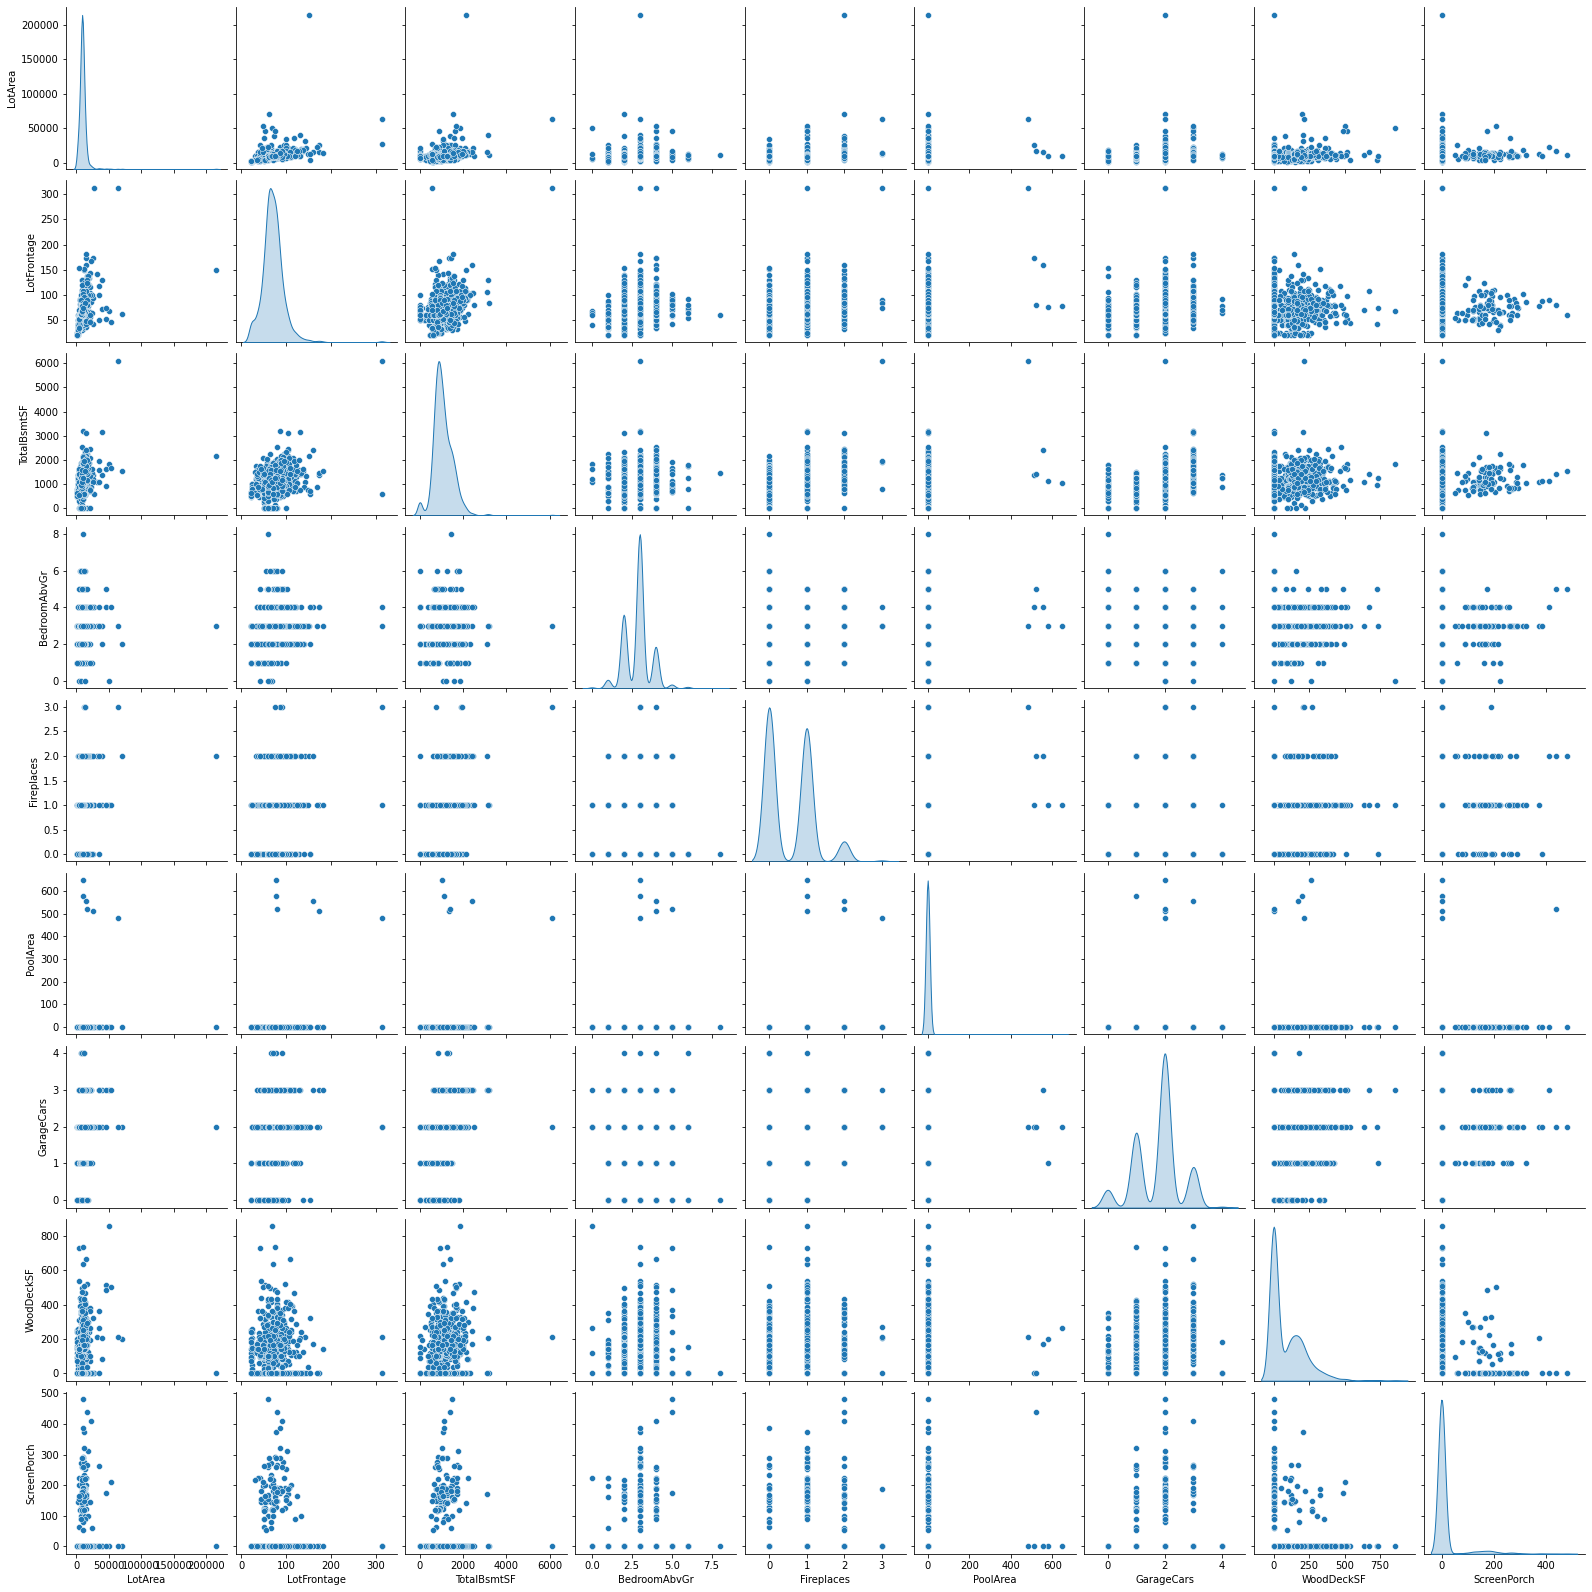

In [5]:
# Exploring the dataset using a pairplot
import seaborn as sns
sns.pairplot(house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 
                     'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF', 
                     'ScreenPorch']], diag_kind='kde')

In [6]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [7]:
house.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [8]:
X_train_tensor = tf.convert_to_tensor(X_train.values)
y_train_tensor = tf.convert_to_tensor(y_train)

Defining the layers of the model

Using as activation functions:
1.   Sigmoid =  Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)) 
2.   Relu = Applies the rectified linear unit activation function
3.   Elu = Exponential Linear Unit
4.   Linear =  Linear activation function
5.   Selu = Scaled Exponential Linear Unit


In [9]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation="sigmoid"),
    tf.keras.layers.Dense(units=25, activation="relu"),
    tf.keras.layers.Dense(units=50, activation="elu"),
    tf.keras.layers.Dense(units=75, activation="linear"),
    tf.keras.layers.Dense(units=1, activation="selu"), 
    
    # optionally, more layers
])

**<font color = "red"> The number of units in the last layers here must be  equal to what you are predicting, in this exemple I want to predict just one variable so this way the last layer should have just 1 unit** </font>


Compiling the model

Here three things were defined:

-**The optimizer**: this is the method that your network will use to update the weights. The Adam optimizer is an “improved” version of the Gradient Descent that you learned in the 3Blue1Brown video series. </br>
-**The learning rate**: this defines how fast or slow we update the weights. It is typically a small value (below 0.5). </br>
-**The loss function**: this is the function that will calculate how well the model is doing. For regression, a typical choice is the Mean Squared Error, which can be inputted as the string mse.

In [10]:
#importing the Mean Squared Error for the Loss function
from tensorflow.keras.losses import MeanSquaredError

In [11]:
deep_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='MeanSquaredError')

In [12]:
len(X_train_tensor)

900

In [13]:
len(y_train_tensor)

900

Fitting the model

In [14]:
%%time
history = deep_model.fit(
    X_train_tensor, y_train_tensor,
    epochs=100, # iterate through the whole dataset x times, where x = epochs
    verbose=0, # suppress logging messages
    validation_split = 0.2) # Calculate validation results on x% of the training data (values between 0 - 1)

CPU times: user 13.1 s, sys: 1.06 s, total: 14.2 s
Wall time: 16.7 s


In [15]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 25)                275       
                                                                 
 dense_2 (Dense)             (None, 50)                1300      
                                                                 
 dense_3 (Dense)             (None, 75)                3825      
                                                                 
 dense_4 (Dense)             (None, 1)                 76        
                                                                 
Total params: 5,576
Trainable params: 5,576
Non-trainable params: 0
_________________________________________________________________


Plotting the loss

In [16]:
import matplotlib.pyplot as plt
 
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [House Price]')
  plt.legend()
  plt.grid(True)

def plot_loss_limit(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.125, 0.16])
  plt.xlabel('Epoch')
  plt.ylabel('Error [House Price]')
  plt.legend()
  plt.grid(True)  

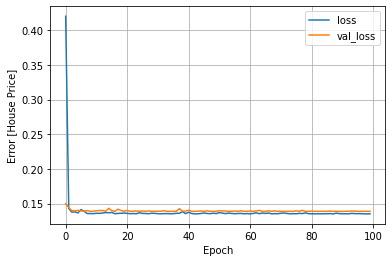

In [17]:
 plot_loss(history)

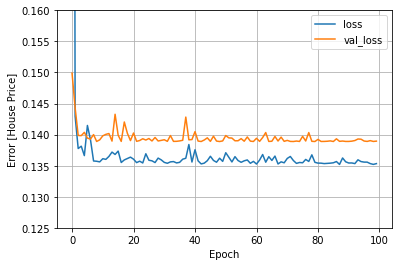

In [18]:
plot_loss_limit(history)

**Iterate** </br>
Use Feature Selection and different preprocessing strategies (scaling, filling missing values…) to transform the data you are feeding to the model, and run your modelling pipeline again (and again, and again…). Do the same with the model architecture and the parameters you defined through your script. Are you able to improve the performance of the model?

**Checking the performance on the training set**

In [19]:
from sklearn.metrics import mean_squared_error

predicted_y = deep_model.predict(X_test)
print("Error on the training set:", mean_squared_error(y_test, predicted_y).round(5))

10/10 [==============================] - 0s 2ms/step
Error on the training set: 0.1227


**Checking the performance on the test set**

In [20]:
from sklearn.metrics import mean_absolute_error
 
predictions = deep_model.predict(X_test)
print("Error on the test set:", mean_absolute_error(y_test, predictions).round(5))

10/10 [==============================] - 0s 2ms/step
Error on the test set: 0.2563
